**Set up notebook:**

In [1]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Mounted at /content/drive


In [9]:
import sys
sys.path.append('../')
sys.path.append('../library/')

In [10]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import seaborn as sns
from library.malib import load_data

**Load dataset:**

In [2]:
data_folder = '~/MA/Dataset/'

In [11]:
#Read WTG data
signals_train = 'wind-farm-1-signals-training.csv'
signals_test = 'wind-farm-1-signals-testing.csv'
all_data = load_data(data_folder=data_folder, file_name_1=signals_train, file_name_2=signals_test, time_index_column='Timestamp', delimeter=';')
# all_data = pd.concat([pd.read_csv(data_folder + signals, delimiter=';'), pd.read_csv(data_folder + signals_test, delimiter=';')], ignore_index=True)
# all_data['Timestamp'] = pd.to_datetime(all_data['Timestamp'])
# all_data.set_index('Timestamp', inplace=True)

#Filter T_09 data out
wtg_data = all_data[all_data.Turbine_ID == 'T09']

#wtg_data = wtg_data[wtg_data['Grd_Prod_Pwr_Avg'] > 0]
print(wtg_data.dtypes)
wtg_data.head()

Turbine_ID                object
Gen_RPM_Max              float64
Gen_RPM_Min              float64
Gen_RPM_Avg              float64
Gen_RPM_Std              float64
                          ...   
Grd_Prod_PsbleCap_Max    float64
Grd_Prod_PsbleCap_Min    float64
Grd_Prod_PsbleCap_Std    float64
Gen_Bear2_Temp_Avg         int64
Nac_Direction_Avg        float64
Length: 82, dtype: object


,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,T09,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,44,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
2016-01-01 00:10:00+00:00,T09,1485.0,1239.7,1321.4,50.4,40.0,58,57,58,44,...,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,293.3,227.4,33,214.0
2016-01-01 00:20:00+00:00,T09,1441.0,1274.6,1363.4,31.0,40.0,58,57,58,44,...,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,904.9,4.2,33,214.0
2016-01-01 00:30:00+00:00,T09,1549.4,1266.5,1379.7,76.8,41.0,59,58,59,44,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,33,214.0
2016-01-01 00:40:00+00:00,T09,1536.5,1337.1,1426.9,42.0,41.0,59,58,59,44,...,-998.9,-730.8,-1000.0,13.9,998.9,1000.0,730.8,13.9,34,214.0


In [12]:
wtg_data.tail()

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:10:00+00:00,T09,1513.6,1241.0,1361.0,91.5,39.0,61,60,61,45,...,-991.8,-734.1,-1000.0,32.6,991.8,1000.0,734.1,32.6,32,319.9
2017-12-31 23:20:00+00:00,T09,1283.1,1233.6,1252.4,9.2,39.0,61,59,61,45,...,-941.4,-445.2,-1000.0,108.9,941.4,1000.0,445.2,108.9,32,321.3
2017-12-31 23:30:00+00:00,T09,1259.7,1239.3,1250.2,3.9,39.0,60,59,61,45,...,-846.3,-300.3,-1000.0,178.8,846.3,1000.0,300.3,178.8,32,329.5
2017-12-31 23:40:00+00:00,T09,1279.2,1241.8,1253.0,6.7,39.0,60,59,60,45,...,-999.6,-964.1,-1000.0,2.8,999.6,1000.0,964.1,2.8,32,329.6
2017-12-31 23:50:00+00:00,T09,1258.3,1239.7,1249.5,3.1,39.0,60,58,60,45,...,-955.8,-372.9,-1000.0,119.2,955.8,1000.0,372.9,119.2,32,339.7


In [41]:
#Read log data
logs_2016 = 'wind-farm-1-logs-2016.csv'
logs_2017 = 'wind-farm-1-logs-2017.csv'
log_data = load_data(data_folder=data_folder, file_name_1=logs_2016, file_name_2=logs_2017, time_index_column='TimeDetected', delimeter=';')
log_data = log_data.loc[log_data.index.notnull()]
log_data = log_data[log_data['UnitTitle'] == 'T09']
log_data.head()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2016-01-01 00:11:33+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 00:41:33+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 01:11:32+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 01:41:32+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 02:13:33+00:00,NaN,T09,"Gen. ext. vent. 1, temp: 49°C",NaN


In [42]:
log_data.tail()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2017-12-31 23:16:55+00:00,NaN,T09,External power ref.:2000kW,NaN
2017-12-31 23:43:48+00:00,NaN,T09,Wind: 4.9 m/s Gen:1248.1 RPM,NaN
2017-12-31 23:43:48+00:00,NaN,T09,Pitch: -1.3° Power: 191.0 kW,NaN
2017-12-31 23:43:48+00:00,NaN,T09,E.Wind: 5.1m/s Nac.Dir: 340.4°,NaN
2017-12-31 23:46:55+00:00,NaN,T09,External power ref.:2000kW,NaN


**Following failures were reported for the turbine:**

Failure Group 1: GENERATOR_BEARING June 7, 2016 4:59 PM High temperature generator bearing; GENERATOR_BEARING October 17, 2016 9:19 AM Generator bearings replaced

In [43]:
target = 'Gen_Bearing_Temp_Avg'

In [44]:
#Logs containing "bearing 1": related to generator bearing 1 damage
logs_1 = log_data[log_data.Remark.str.contains('bearing 1', na=False, case=False)].rename(columns={'Remark' : 'Remark_1'})
logs_1

,TimeReset,UnitTitle,Remark_1,UnitTitleDestination
TimeDetected,,,,
2016-06-07 16:58:42+00:00,07.06.16 18:54,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-21 14:45:57+00:00,21.06.16 14:50,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-21 16:20:39+00:00,21.06.16 16:33,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-21 17:58:34+00:00,21.06.16 18:30,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-22 15:01:24+00:00,22.06.16 17:09,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-03 15:57:13+00:00,03.07.16 16:02,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-03 17:10:13+00:00,03.07.16 17:51,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-03 20:21:40+00:00,03.07.16 21:23,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-09 17:10:00+00:00,09.07.16 20:23,T09,High temp. Gen bearing 1: 99°C,NaN


Failure 2: GEARBOX October 11, 2016 8:06 AM Gearbox repaired

In [45]:
#NO RELEVANT LOGS FOUND
logs_2 = log_data[log_data.Remark.str.contains('high temp gear', na=False, case=False)].rename(columns={'Remark' : 'Remark_2'})
logs_2

,TimeReset,UnitTitle,Remark_2,UnitTitleDestination
TimeDetected,,,,


Failure 3: GENERATOR_BEARING January 25, 2017 12:55 PM Generator bearings replaced

In [46]:
#NO RELEVANT LOGS FOUND
logs_3 = log_data[log_data.Remark.str.contains('bearing 2', na=False, case=False)].rename(columns={'Remark' : 'Remark_3'})
logs_3

,TimeReset,UnitTitle,Remark_3,UnitTitleDestination
TimeDetected,,,,


Failure 4: HYDRAULIC_GROUP September 16, 2017 3:46 PM Pitch position error related GH

In [47]:
#Logs containing "pitch c": related to Pitch position error
logs_4 = log_data[log_data.Remark.str.contains('pitch c', na=False, case=False)].rename(columns={'Remark' : 'Remark_4'})
logs_4

,TimeReset,UnitTitle,Remark_4,UnitTitleDestination
TimeDetected,,,,
2016-12-29 09:17:26+00:00,29.12.16 09:18,T09,"Pitch C ref:10.2°, Act.: 5.6°",NaN
2016-12-29 09:21:23+00:00,29.12.16 09:23,T09,"Pitch C ref:77.0°, Act.:89.5°",NaN
2016-12-29 09:23:38+00:00,29.12.16 09:28,T09,"Pitch C ref:79.8°, Act.:89.5°",NaN
2016-12-29 09:24:44+00:00,29.12.16 09:28,T09,"Pitch C ref:79.8°, Act.:89.5°",NaN
2016-12-29 09:28:54+00:00,29.12.16 09:48,T09,"Pitch C ref:79.7°, Act.:89.5°",NaN
2016-12-29 09:48:58+00:00,29.12.16 10:50,T09,"Pitch C ref:79.8°, Act.:89.5°",NaN
2016-12-29 10:53:28+00:00,29.12.16 11:56,T09,"Pitch C ref:52.4°, Act.:32.2°",NaN
2016-12-29 12:21:15+00:00,NaN,T09,"Pitch C ref:49.9°, Act.:89.5°",NaN
2016-12-29 12:49:10+00:00,29.12.16 12:49,T09,"Pitch C ref: 5.3°, Act.:-0.3°",NaN


Failure 5: GEARBOX October 18, 2017 8:32 AM Gearbox noise

In [48]:
#NO RELEVANT LOGS FOUND
logs_5 = log_data[log_data.Remark.str.contains('high temp gear', na=False, case=False)].rename(columns={'Remark' : 'Remark_5'})
logs_5

,TimeReset,UnitTitle,Remark_5,UnitTitleDestination
TimeDetected,,,,


In [49]:
#Create a new column to label the signals: 'F1'/'F2'/'F3'/'F4'/'F5' : Log entry related to 1st/2nd/3rd/4th/5th Failure was found during the previous 10 min, 
#'Reported' : Failure reported by the technician at this time, 'None': nothing reported or logged
#Initialize to 'None'
wtg_data['Failure'] = 'None'

#Join with log data for Failure 1
wtg_data = pd.merge_asof(wtg_data, logs_1['Remark_1'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F1'
wtg_data.loc[wtg_data.Remark_1.str.contains('bearing 1', na=False, case=False), 'Failure'] = 'High temp. Gen bearing 1: __°C'

# #Join with log data for Failure 4
# wtg_data = pd.merge_asof(wtg_data, logs_4['Remark_4'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

# #Label data points 'F4'
# wtg_data.loc[wtg_data.Remark_4.str.contains('pitch c', na=False, case=False), 'Failure'] = 'Pitch C ref:__°, Act.: __°'

#Label reported failures
# wtg_data.loc['2016-06-07 17:00:00+00:00', 'Failure'] = 'Reported F1'
# wtg_data.loc['2016-08-22 06:30:00+00:00', 'Failure'] = 'Reported F1'
# wtg_data.loc['2016-10-11 08:10:00+00:00', 'Failure'] = 'Reported F2'
wtg_data.loc['2016-10-17 09:20:00+00:00', 'Failure'] = 'Generator Bearings replaced'
# wtg_data.loc['2017-01-25 13:00:00+00:00', 'Failure'] = 'Reported F3'
# wtg_data.loc['2017-09-16 15:50:00+00:00', 'Failure'] = 'Reported F4'
# wtg_data.loc['2017-10-18 08:40:00+00:00', 'Failure'] = 'Reported F5'

In [50]:
#Validate
wtg_data['2016-06-07' : '2016-06-07'].dropna(subset=['Remark_1'])

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Failure,Remark_1_x,Remark_4_x,Remark_1_y,Remark_1_x,Remark_4_y,Remark_1_y,Remark_1
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-07 17:00:00+00:00,T09,1755.4,164.3,1609.3,277.0,99.0,138,130,133,51,...,79,92.7,High temp. Gen bearing 1: __°C,High temp. Gen bearing 1: 99°C,NaN,High temp. Gen bearing 1: 99°C,High temp. Gen bearing 1: 99°C,NaN,High temp. Gen bearing 1: 99°C,High temp. Gen bearing 1: 99°C


In [51]:
wtg_data = wtg_data[~wtg_data.index.duplicated()]
x='Timestamp'
c1= '#d3d3d3'
style = 'Failure'
hue = 'Failure'
s = 80

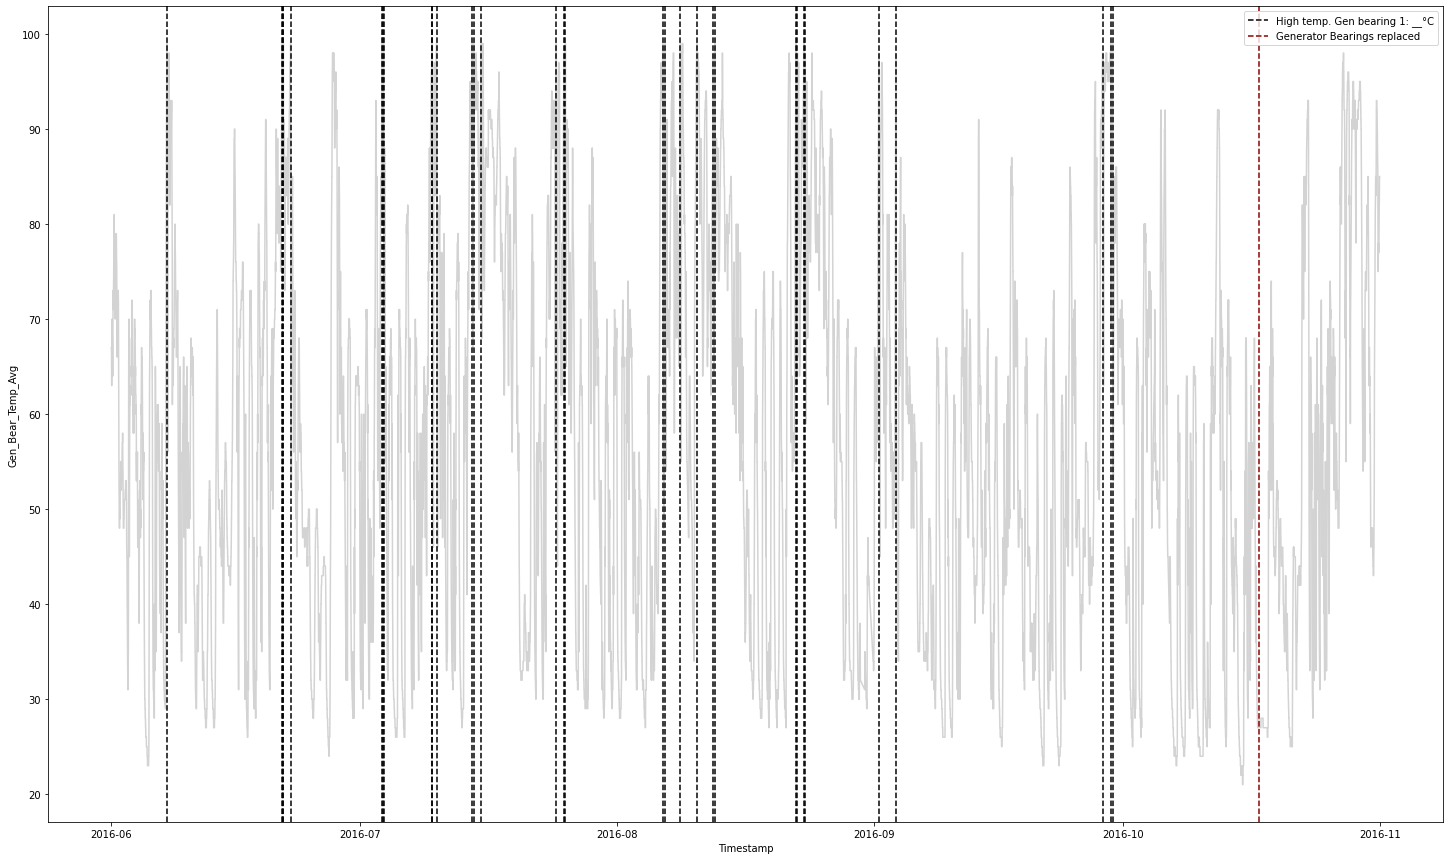

In [60]:
#Visualize Failure 1
y = 'Gen_Bear_Temp_Avg'
data = wtg_data['2016-06-01' : '2016-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color='lightgrey')
for i, row in data[~(data.Failure == 'None')].iterrows():
    plt.axvline(x=i, linestyle='--', color='darkred' if row['Failure'] == 'Generator Bearings replaced' else 'black', 
    label=row['Failure'])
#sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());

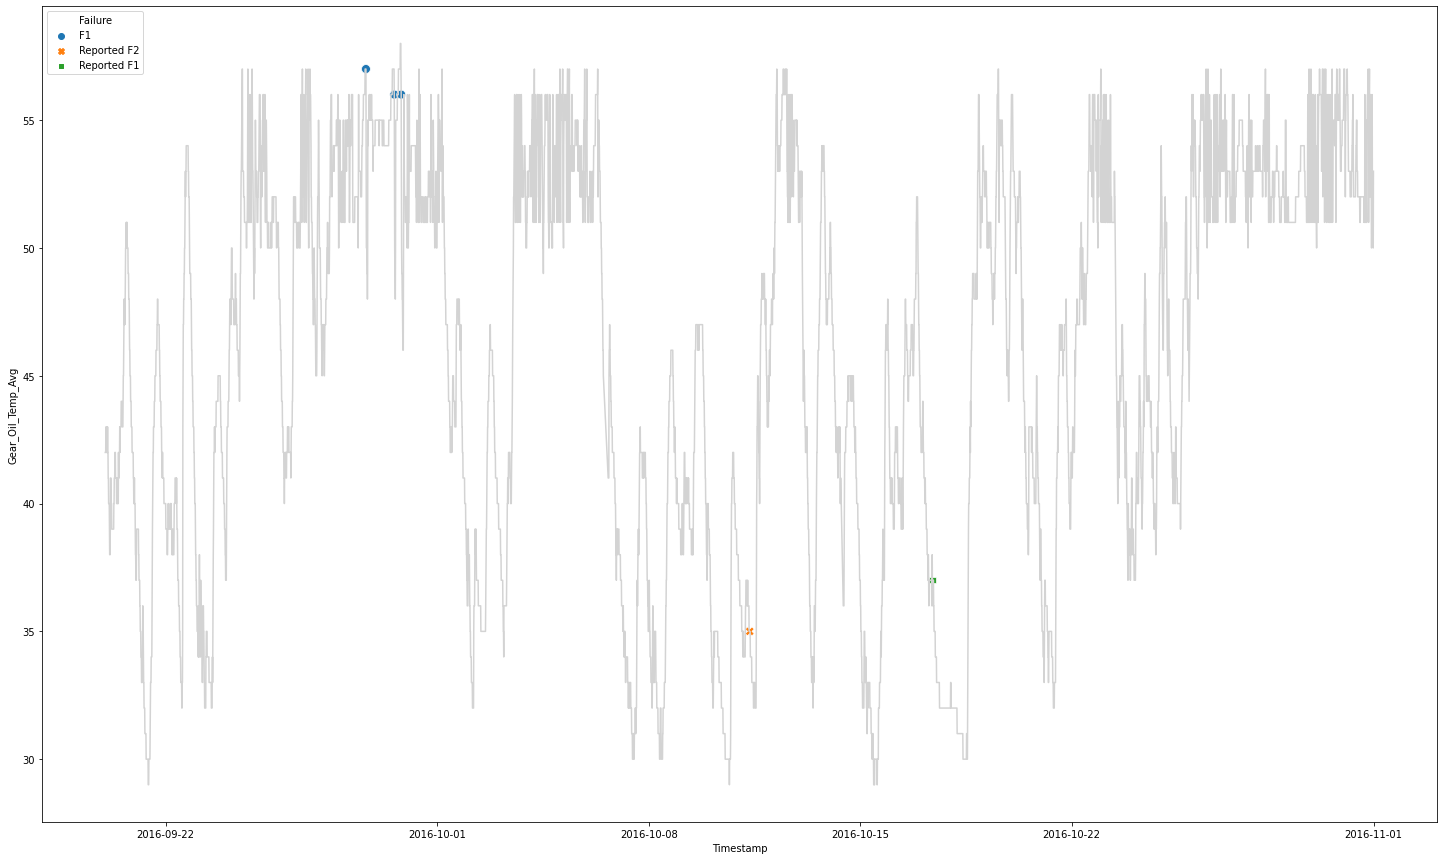

In [ ]:
#Visualize Failure 2
y = 'Gear_Oil_Temp_Avg'
data = wtg_data['2016-09-20' : '2016-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

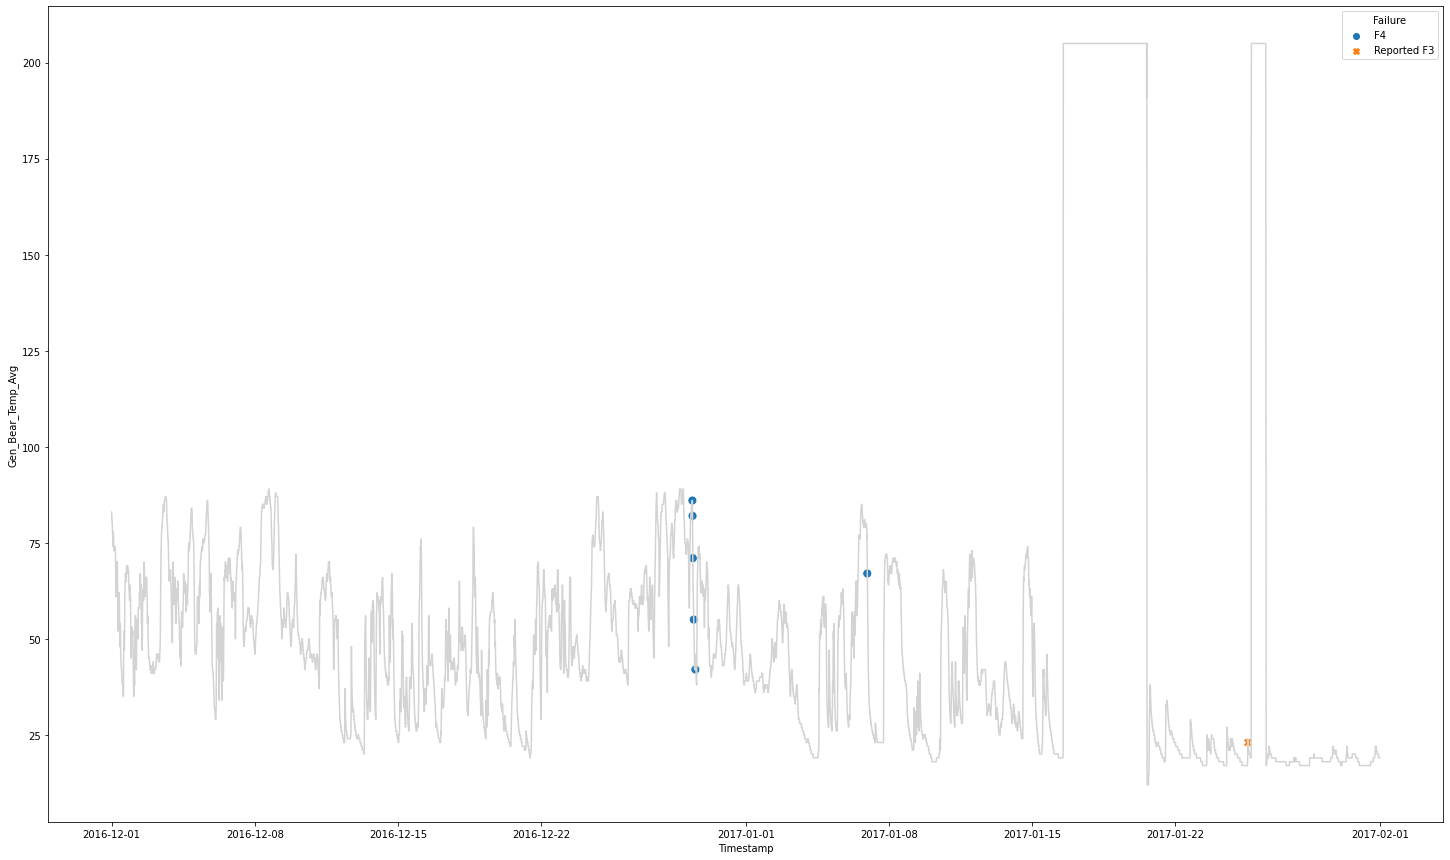

In [ ]:
#Visualize Failure 3 (Bearing 1)
y = 'Gen_Bear_Temp_Avg'
data = wtg_data['2016-12-01' : '2017-01-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

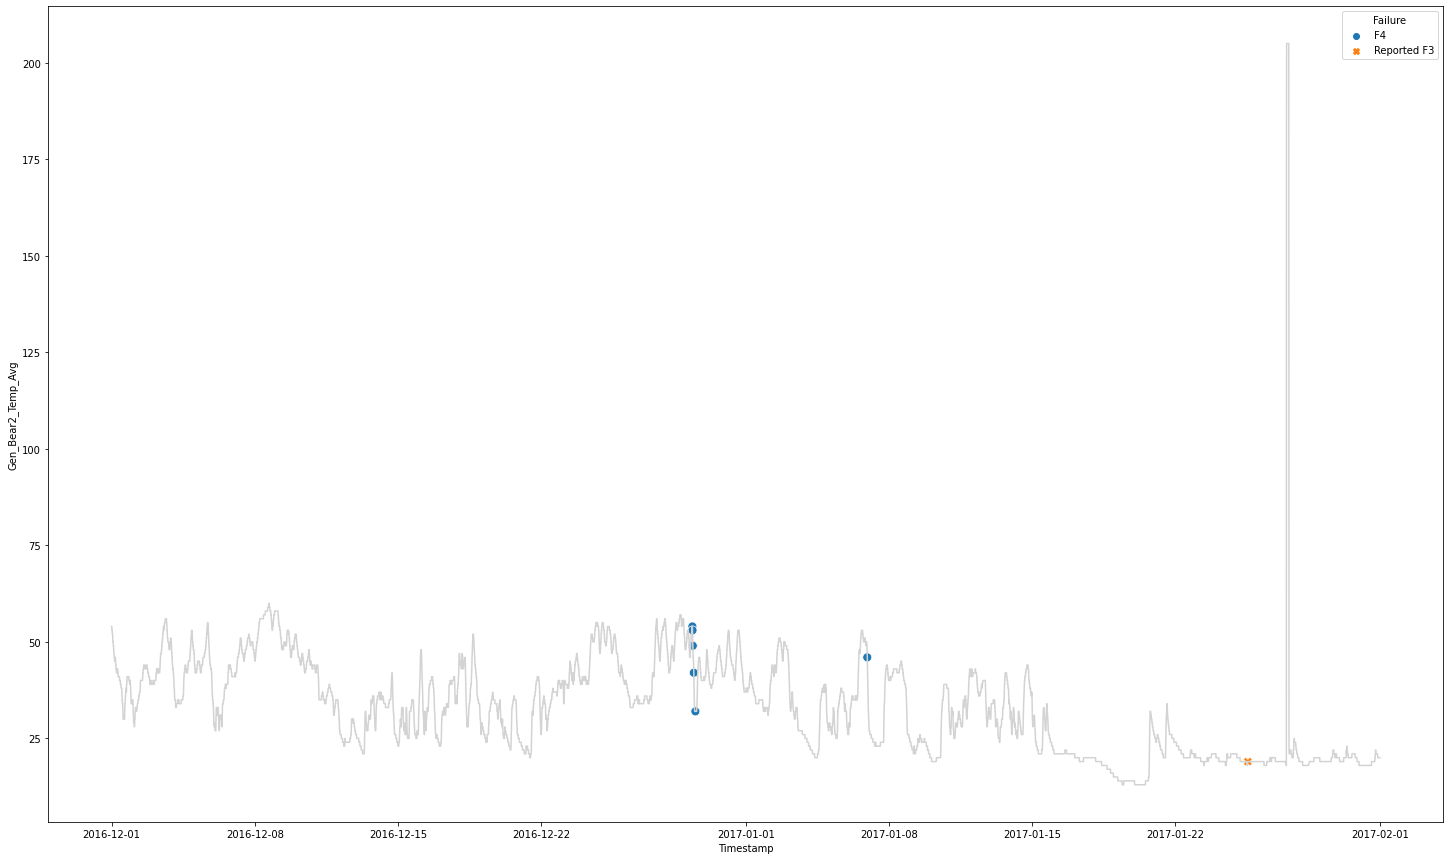

In [ ]:
#Visualize Failure 3 (Bearing 2)
y = 'Gen_Bear2_Temp_Avg'
data = wtg_data['2016-12-01' : '2017-01-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

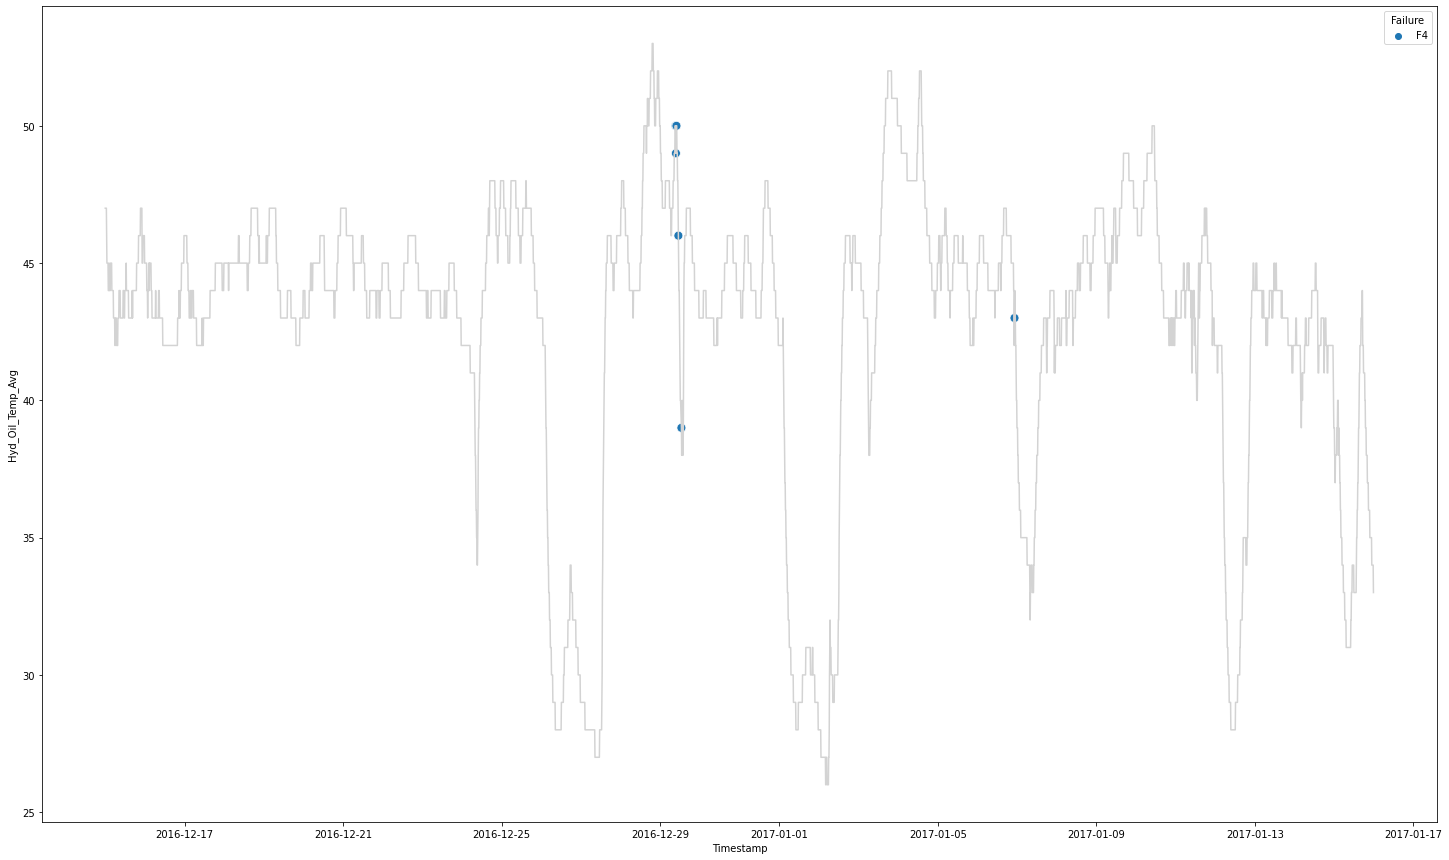

In [ ]:
#Visualize Failure 4 (1st part)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2016-12-15' : '2017-01-15']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

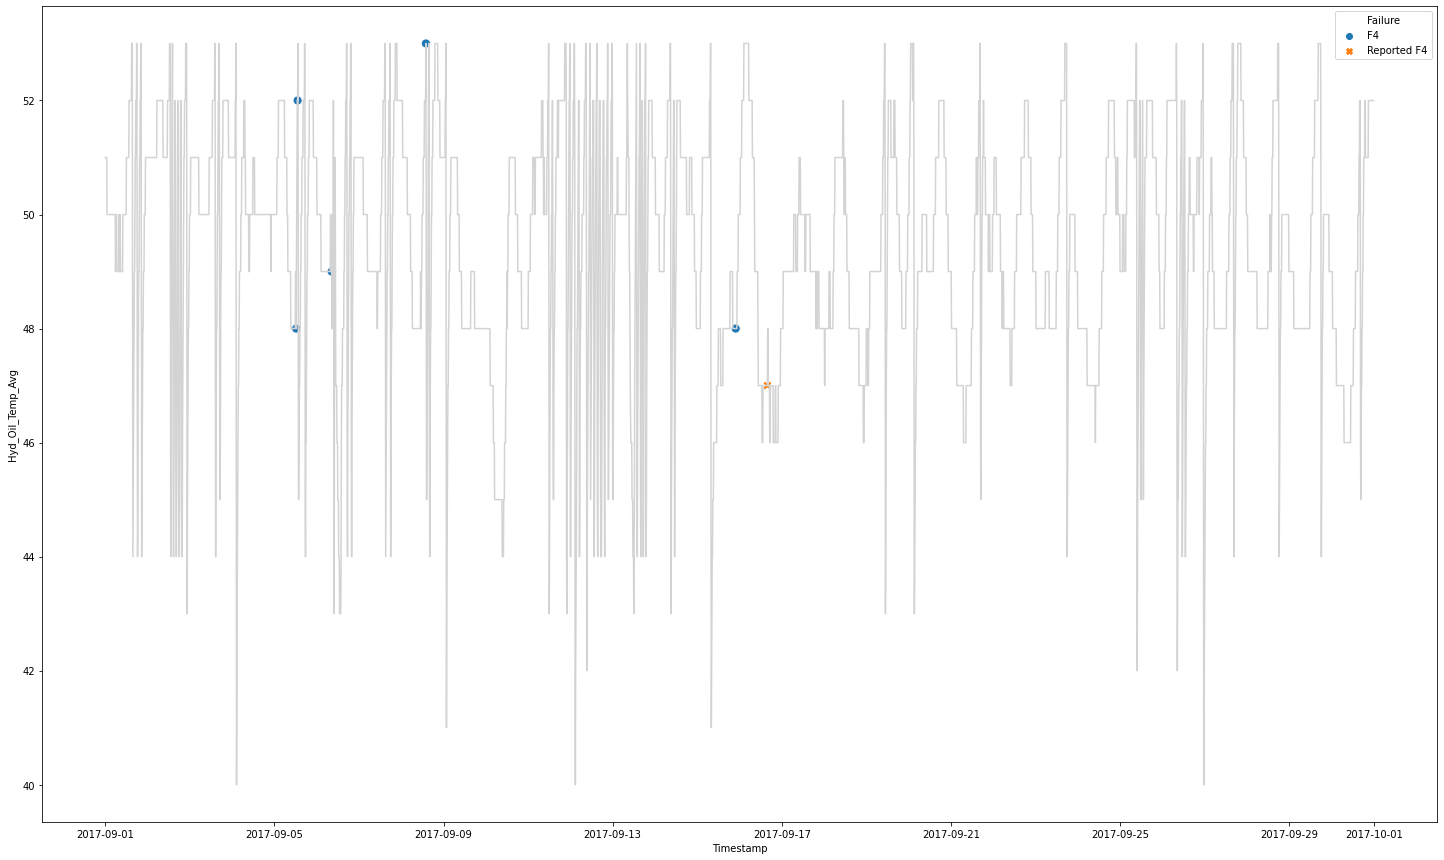

In [ ]:
#Visualize Failure 4 (2nd part)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2017-09-01' : '2017-09-30']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

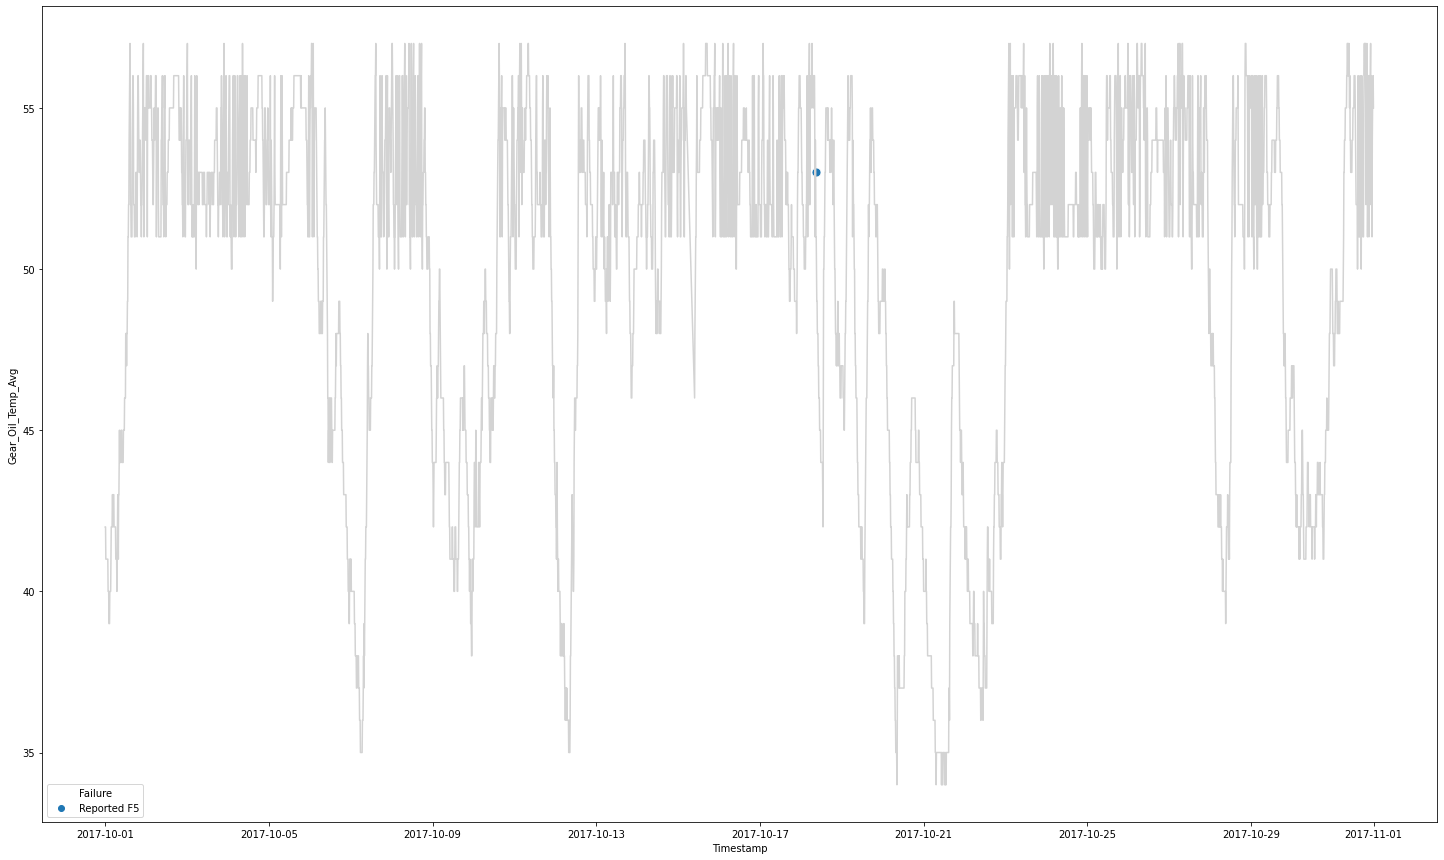

In [ ]:
#Visualize Failure 5
y = 'Gear_Oil_Temp_Avg'
data = wtg_data['2017-10-01' : '2017-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])